# Data 전치리 과정

In [33]:
# 앞으로 사용할 모든 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [34]:
import pandas as pd

csv_path = "../Pokemon.csv"  # 현재 노트북보다 한 폴더 위
original_data = pd.read_csv(csv_path) # 오리지널은 냅두기위해 original 과 pokemon 으로 나눌 예정

print("슝=3")


슝=3


In [35]:
pokemon = original_data.copy() # 원본은 따로 두고 복사본을 사용
print(pokemon.shape) # 데이터의 크기를 출력
pokemon.head() # 데이터의 상위 5개를 출력

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [36]:
# 전설의 포켓몬 데이터 셋
legendary = pokemon[pokemon # 
                    ['Legendary'] == True].reset_index(drop=True)# 전설의 포켓몬만 뽑아서 legendary 변수에 저장
                                                                 # reset은 인덱스를 초기화
print(legendary.shape) # 데이터의 크기를 출력
legendary.head() # 데이터의 상위 5개를 출력

# 일반 포켓몬 데이터 셋
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True) # 일반 포켓몬만 뽑아서 normal 변수에 저장
print(ordinary.shape) # 데이터의 크기를 출력
ordinary.head() # 데이터의 상위 5개를 출력

(65, 13)
(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 7.5 전설의 포켓몬? 먼저 샅샅이 살펴보자  
- 결측치와 전체칼럼
---

In [37]:
pokemon.isnull().sum() # 결측치가 있는지 확인

# Type 2 컬럼에만 총 386개의 결측치가 존재한다.
# 빈 데이터는 조심히 다뤄야 하기 때문에 어떻게 할지 좀이따가 다룰 예정

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [38]:
print(len(pokemon.columns))
pokemon.columns # 컬럼명 출력
'''
# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
Total : 전체 6가지 스탯의 총합. int
HP : 포켓몬의 체력. int
Attack : 물리 공격력. (scratch, punch 등) int
Defense : 물리 공격에 대한 방어력. int
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
Sp. Def : 특수 공격에 대한 방어력. int
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool
'''

13


'\n# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int\nName : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str\nType 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str\nType 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str\nTotal : 전체 6가지 스탯의 총합. int\nHP : 포켓몬의 체력. int\nAttack : 물리 공격력. (scratch, punch 등) int\nDefense : 물리 공격에 대한 방어력. int\nSp. Atk : 특수 공격력. (fire blast, bubble beam 등) int\nSp. Def : 특수 공격에 대한 방어력. int\nSpeed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int\nGeneration : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int\nLegendary : 전설의 포켓몬 여부. !! Target feature !! bool\n'

#### ID 와 이름 알아보기
---

In [39]:
print(len(set(pokemon["#"]))) # 중복되지 않는 포켓몬의 수
print(pokemon[pokemon["#"] == 6]) # 중복되는 포켓몬의 예시

721
   #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False  


In [40]:
print(len(set(pokemon["Name"]))) # 중복되지 않는 포켓몬 이름의 수
# 전체 데이터 갯수와 동일하다.

800


#### 포켓몬의 속성  
---

In [41]:
pokemon.loc[[6, 10]] # 두마리 포켓몬을 살펴본다


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [42]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))
# Type 1은 18개, Type 2는 19개의 속성이 존재한다.

(18, 19)

In [43]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])
# Type 2에만 있는 속성은 없다.

{nan}

In [44]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)
# 속성의 종류는 총 18개이다.

18
['Fairy', 'Ghost', 'Fire', 'Dragon', 'Normal', 'Bug', 'Water', 'Steel', 'Flying', 'Dark', 'Poison', 'Electric', 'Grass', 'Ice', 'Psychic', 'Fighting', 'Rock', 'Ground']


In [45]:
pokemon["Type 2"].isna().sum()

np.int64(386)

#### Type 1 데이터 분포 Plot
---

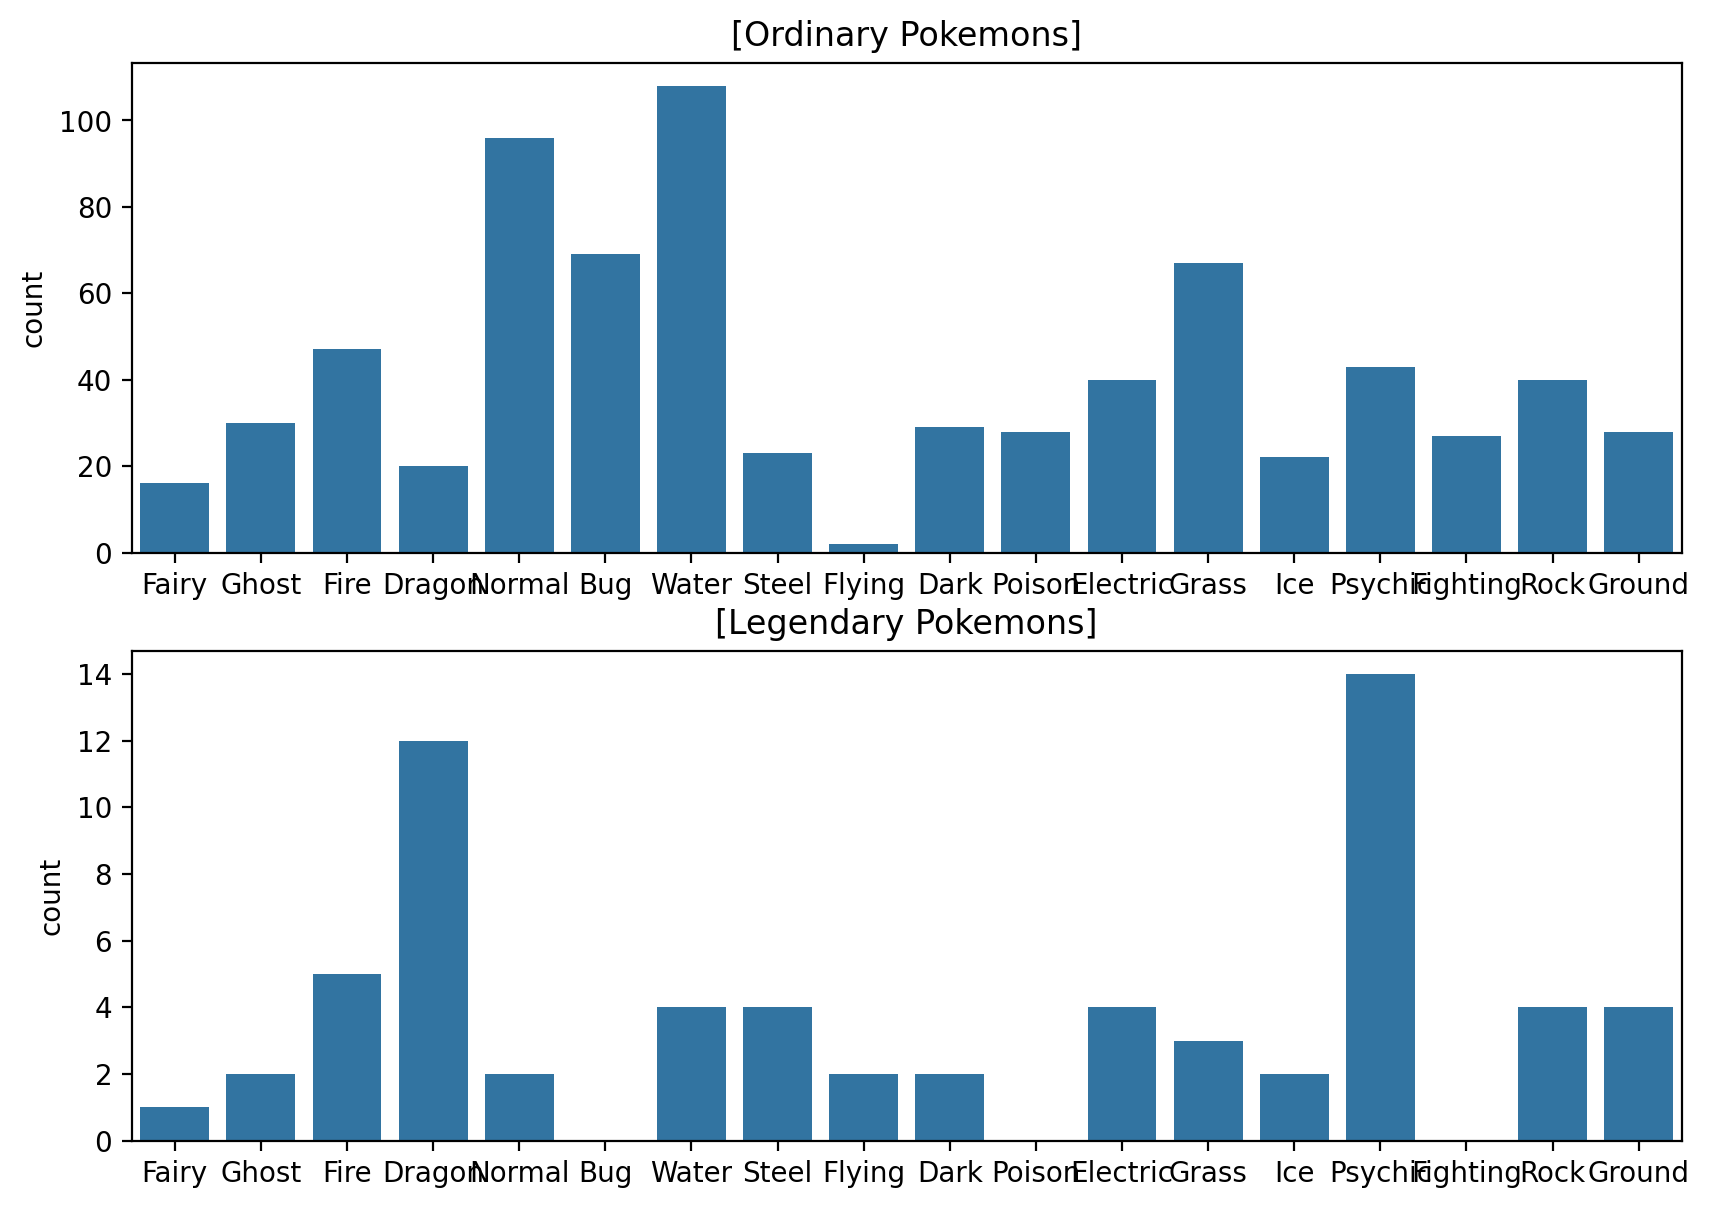

In [46]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [47]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Rock,0.090909
Electric,0.090909
Ice,0.083333


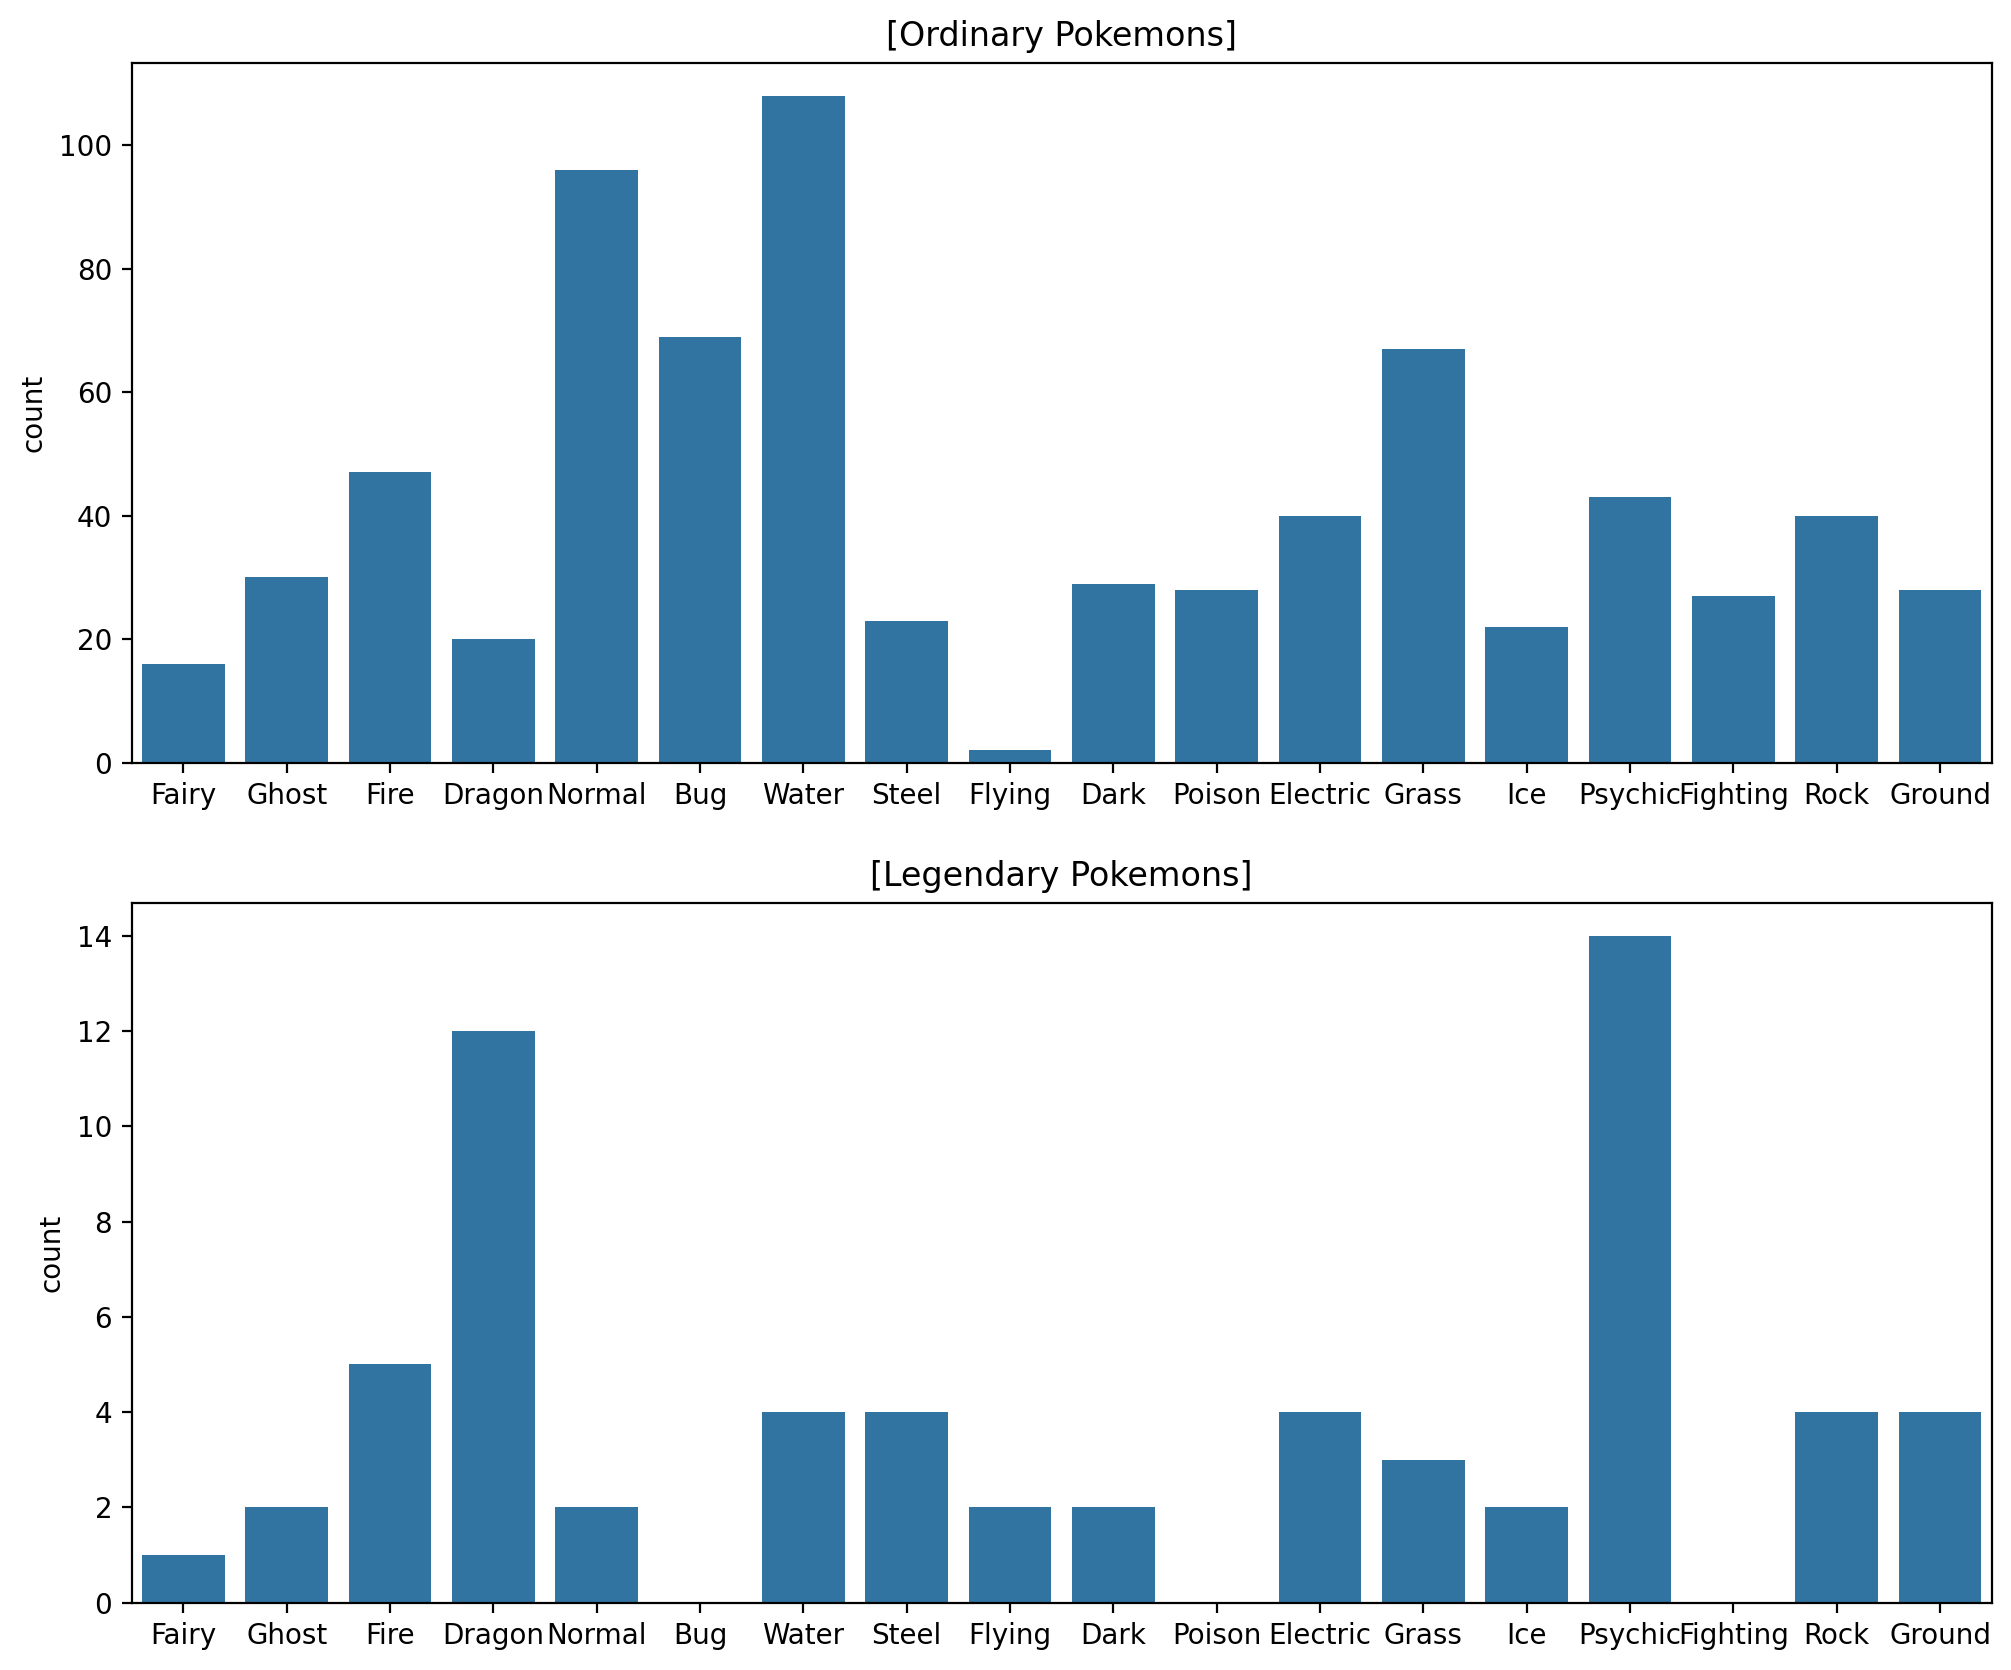

In [48]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

# [[YOUR CODE]]
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [49]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


#### 모든 스탯의 총합
---

- stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [50]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [51]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [np.int64(45), np.int64(49), np.int64(49), np.int64(65), np.int64(65), np.int64(45)]
sum of all stats:  318


In [77]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
print(sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1)))

800


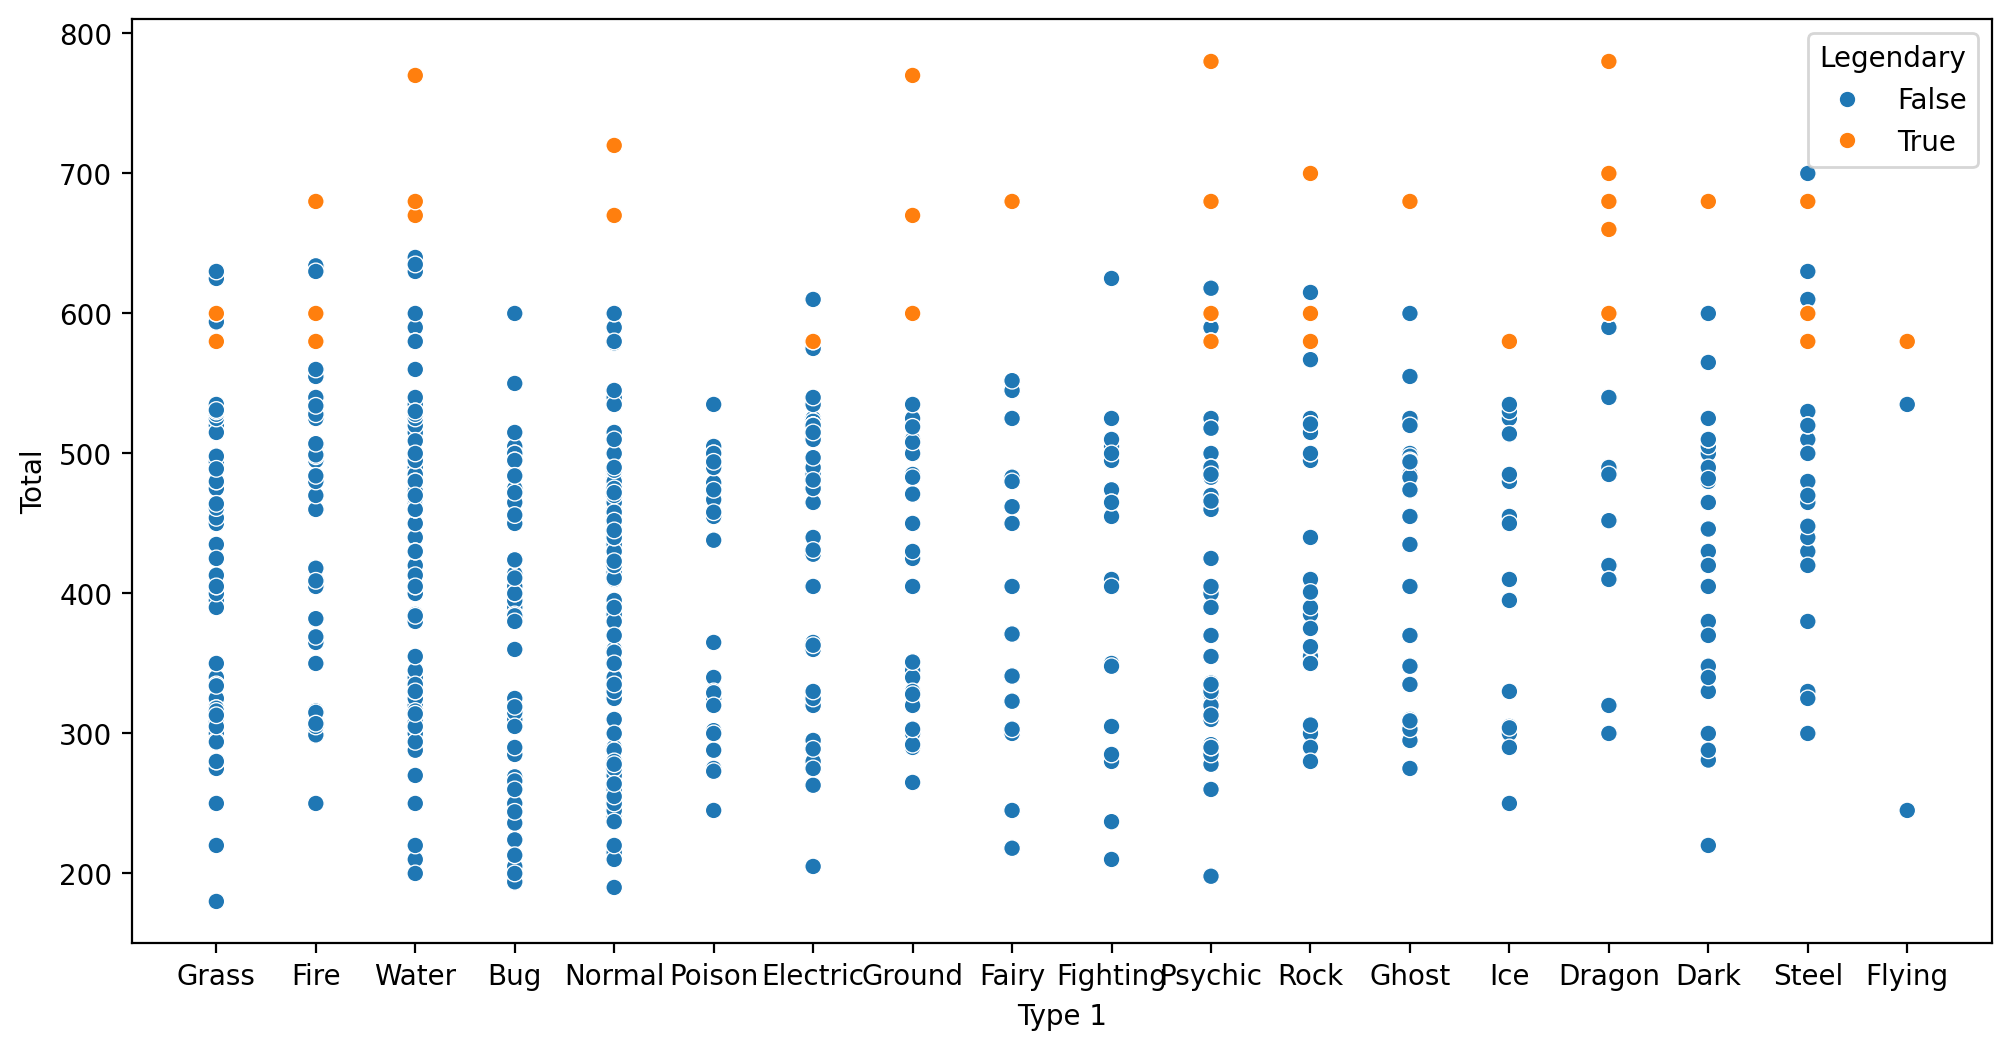

In [53]:
fig, ax = plt.subplots() # 그래프를 그리기 위한 공간을 만들어줍니다.
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary") # Type 1에 따른 Total을 산점도로 나타내되, 전설의 포켓몬 여부에 따라 색을 다르게 표시합니다.
# Type 1에 따른 Total을 산점도로 나타내되, 전설의 포켓몬 여부에 따라 색을 다르게 표시합니다.
plt.show()

#### 세부 스탯
---


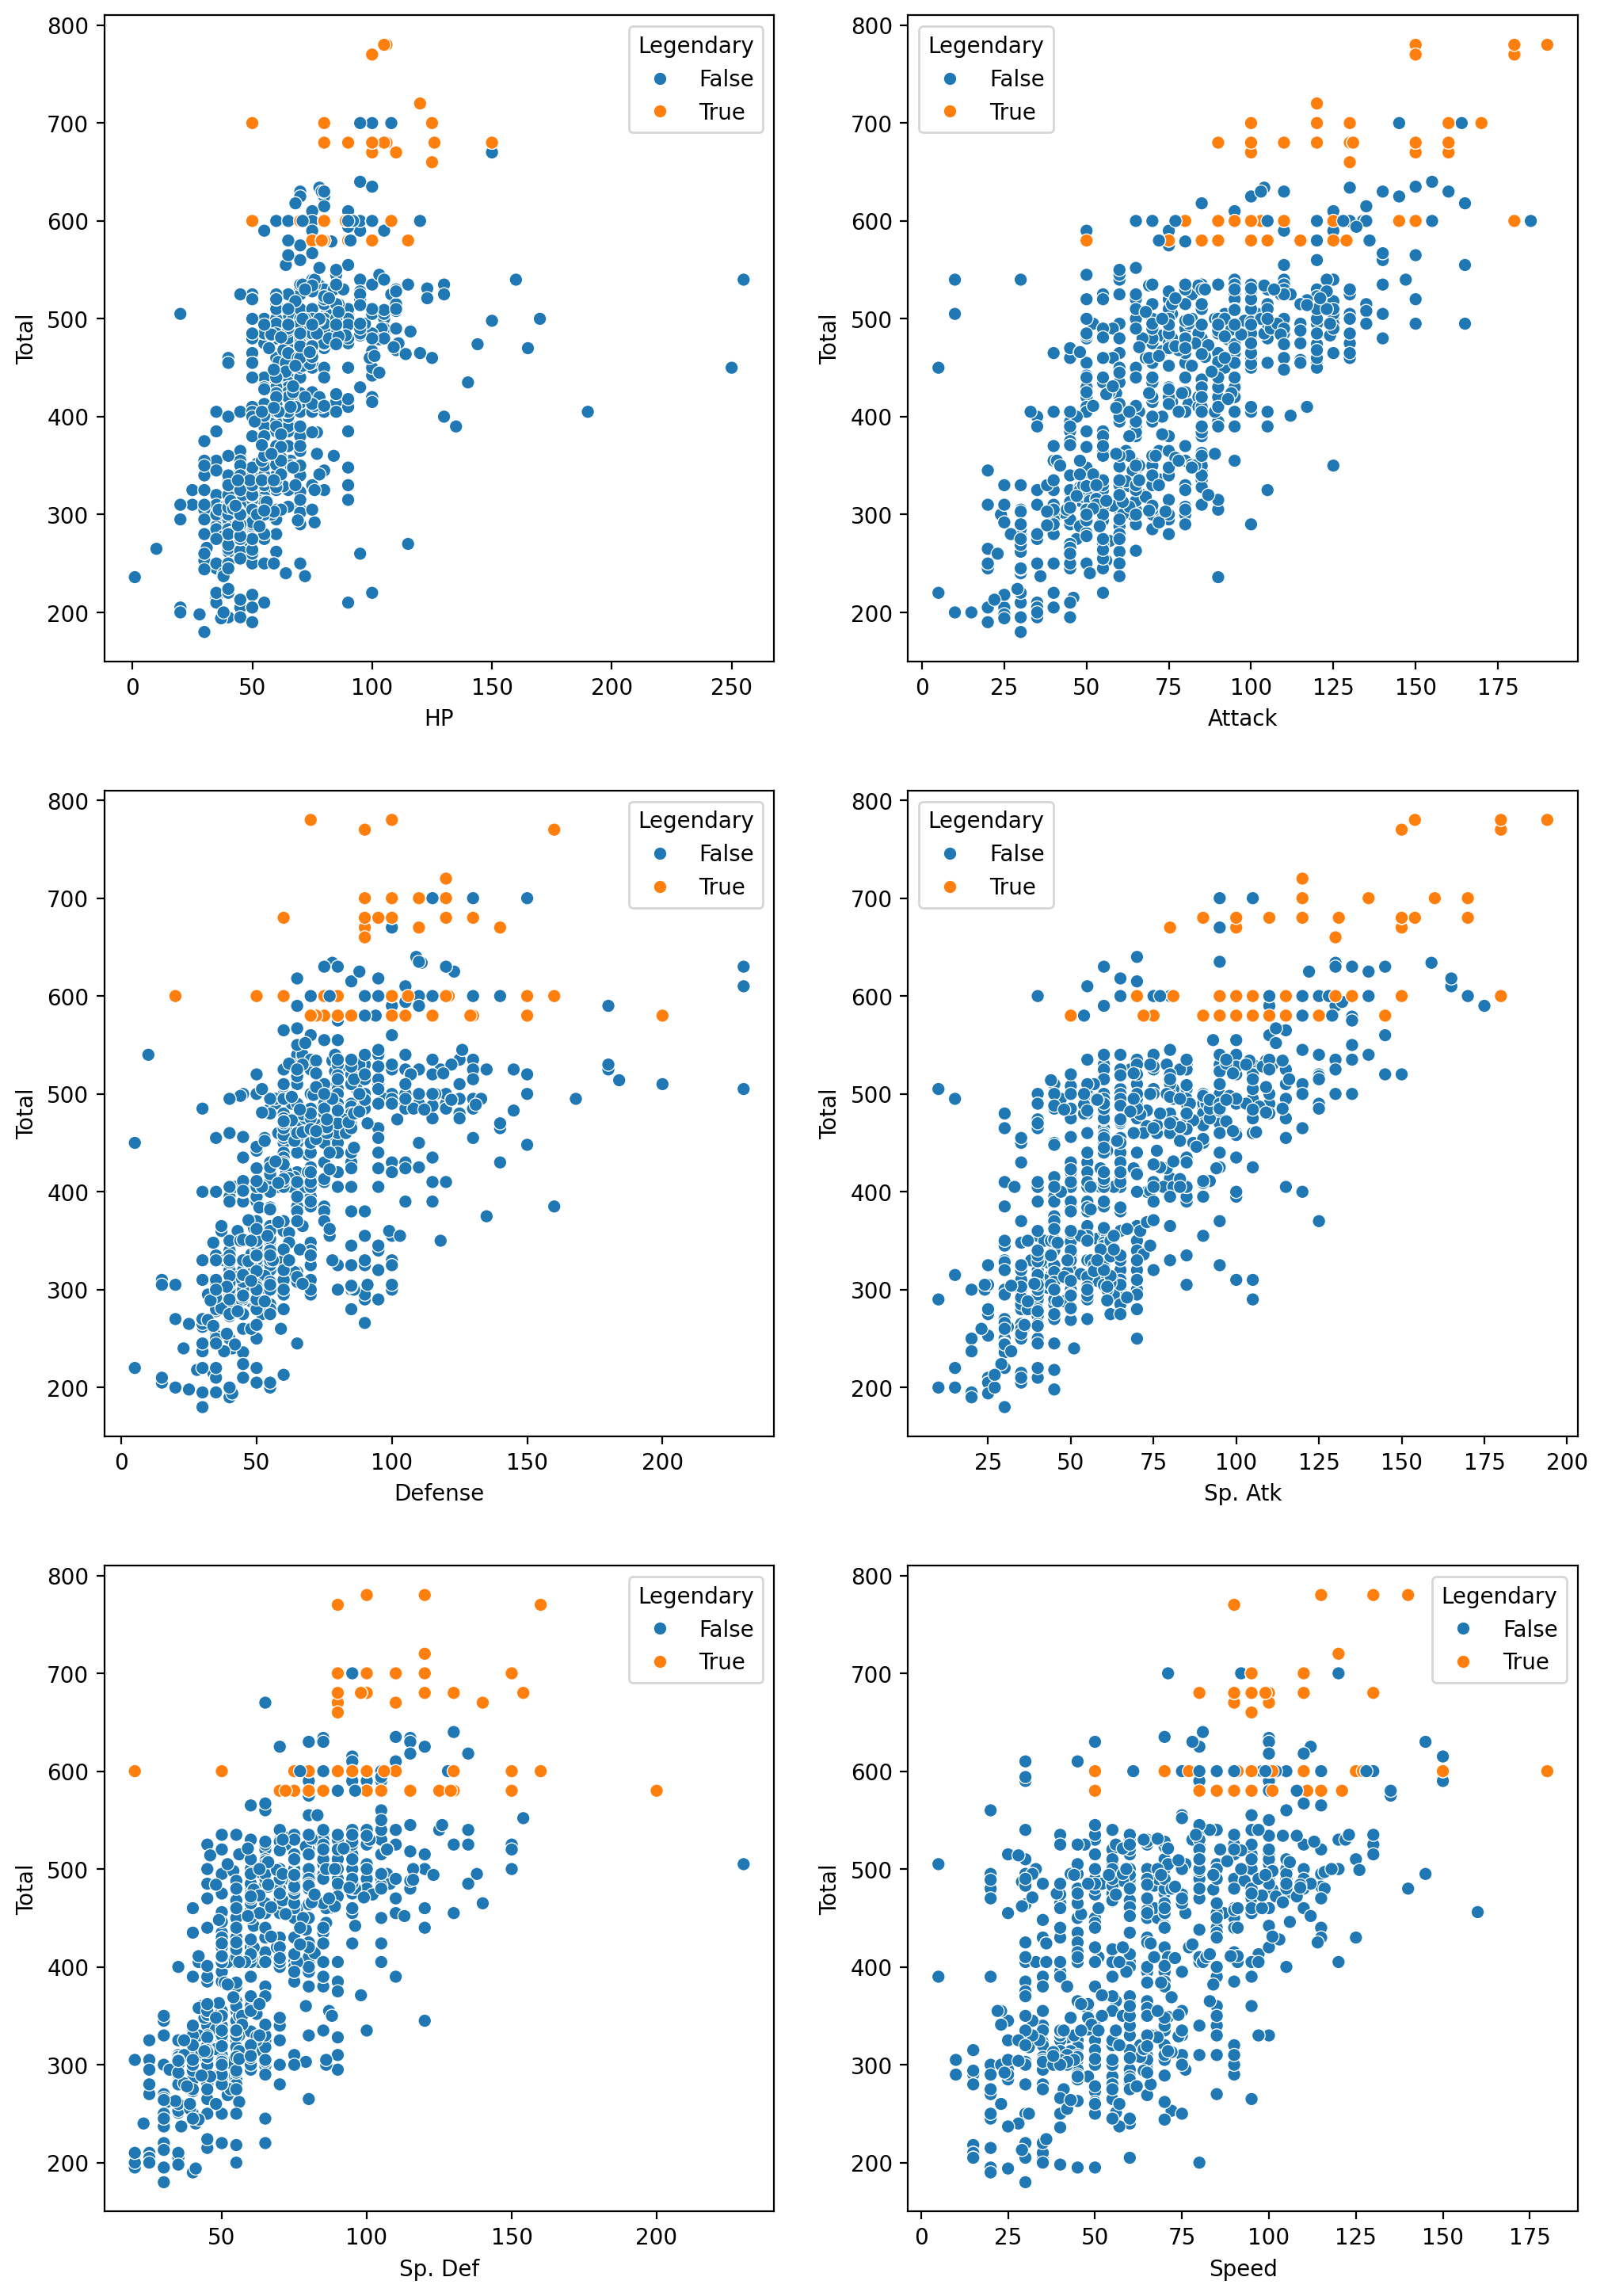

In [54]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

#### 포켓몬의 세대
---

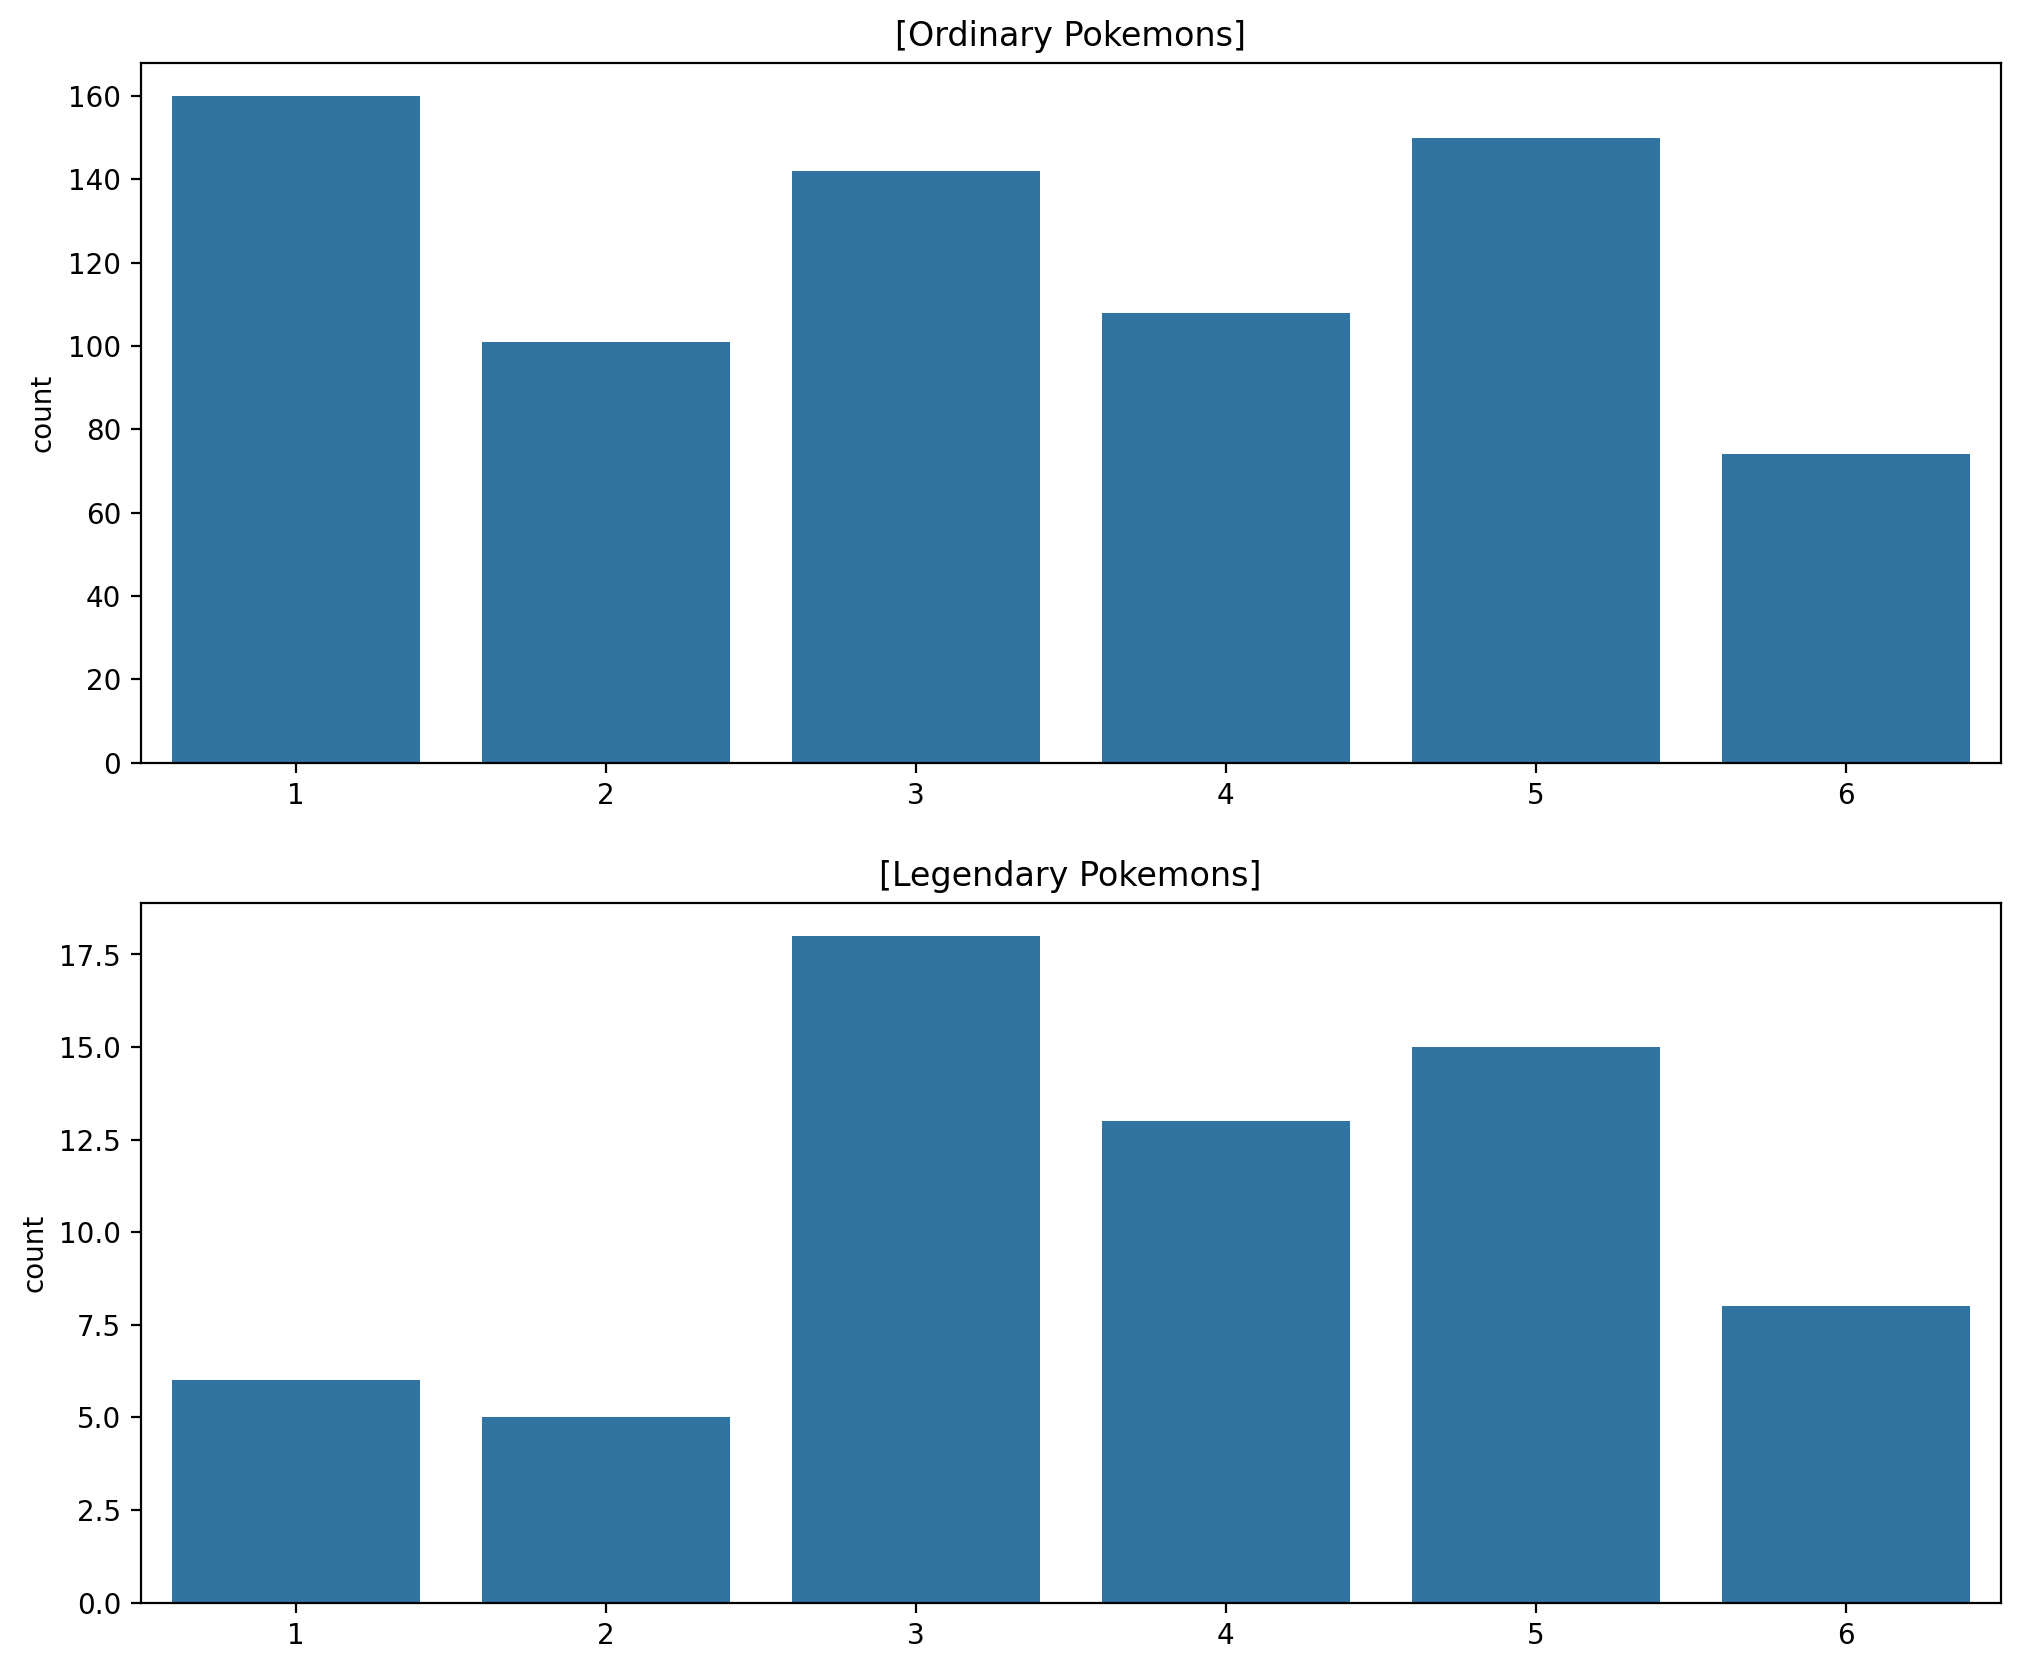

In [55]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

# 전설의 포켓몬과 일반 포켓몬, 그 차이는?


#### Total 값
---

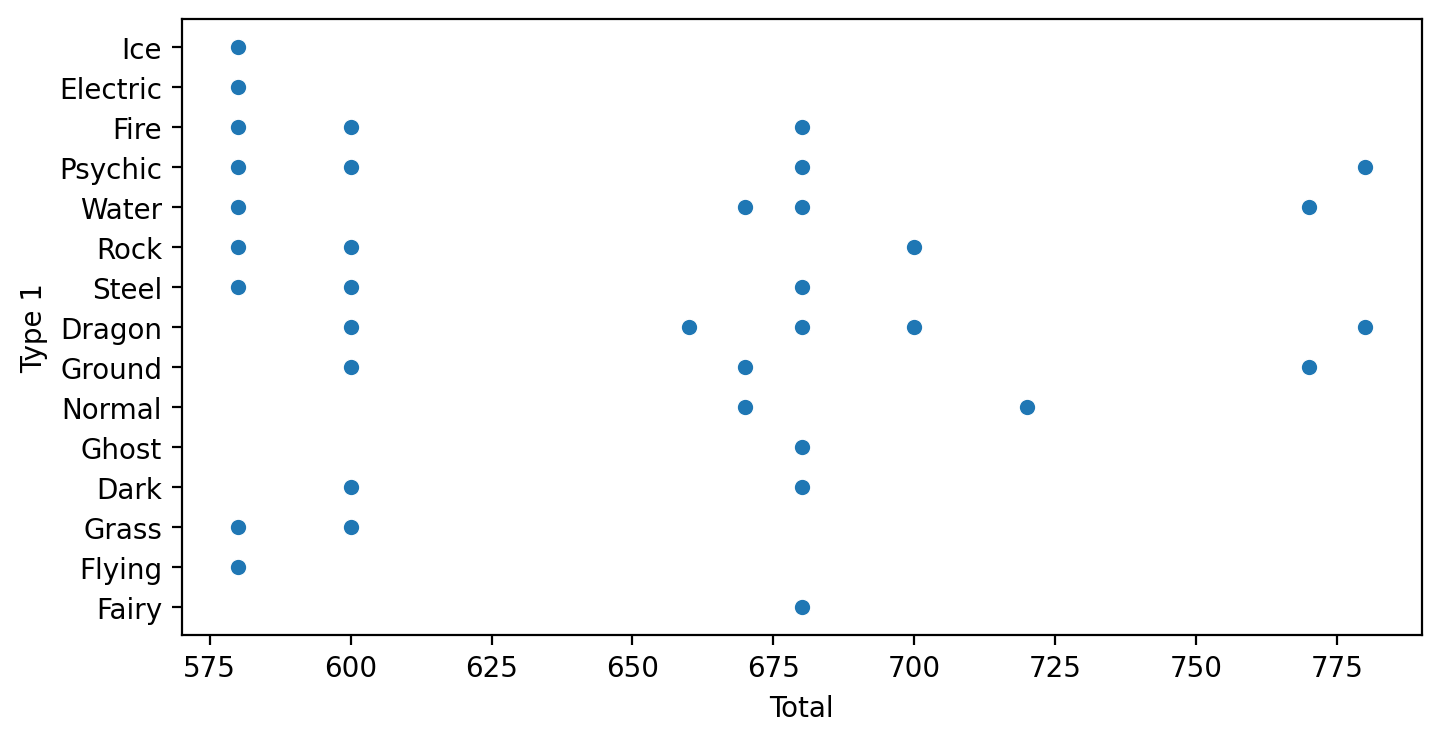

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [57]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


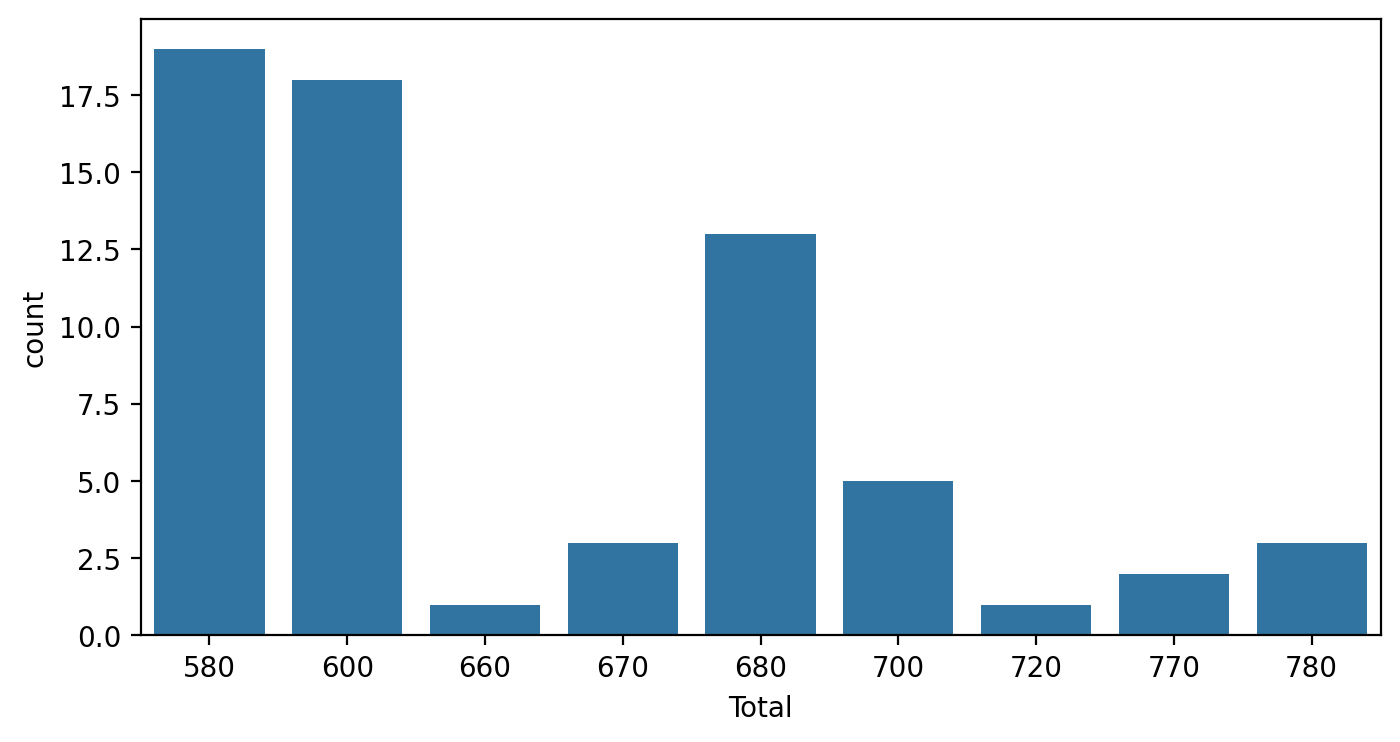

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4) #

sns.countplot(data=legendary, x="Total")
plt.show()

In [59]:
round(65 / 9, 2)

7.22

In [67]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


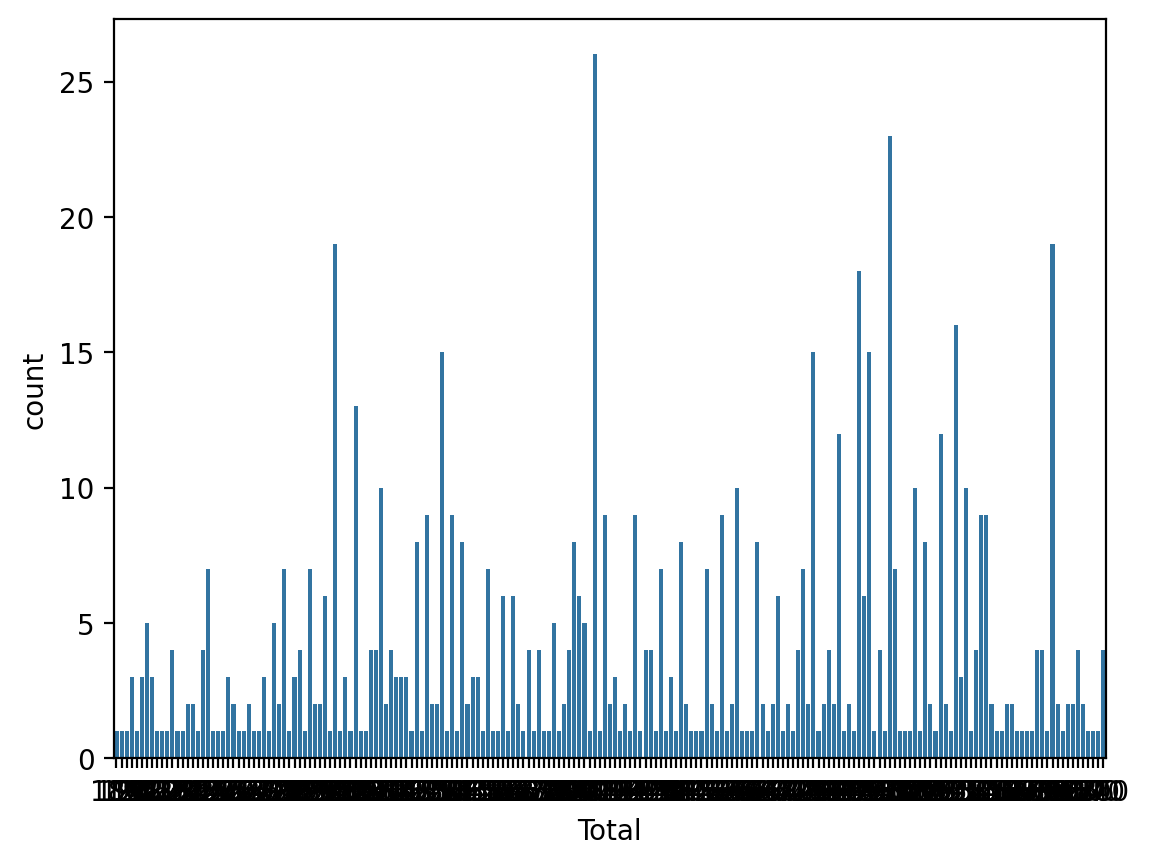

In [ ]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
fig. ax = plt.subplots()
fig.set_size_inches(12, 8)

sns.countplot(data=ordinary, x="Total")
plt.show()

In [68]:
round(735 / 195, 2)

3.77

#### 이름
---

In [69]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [78]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()
# 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [82]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


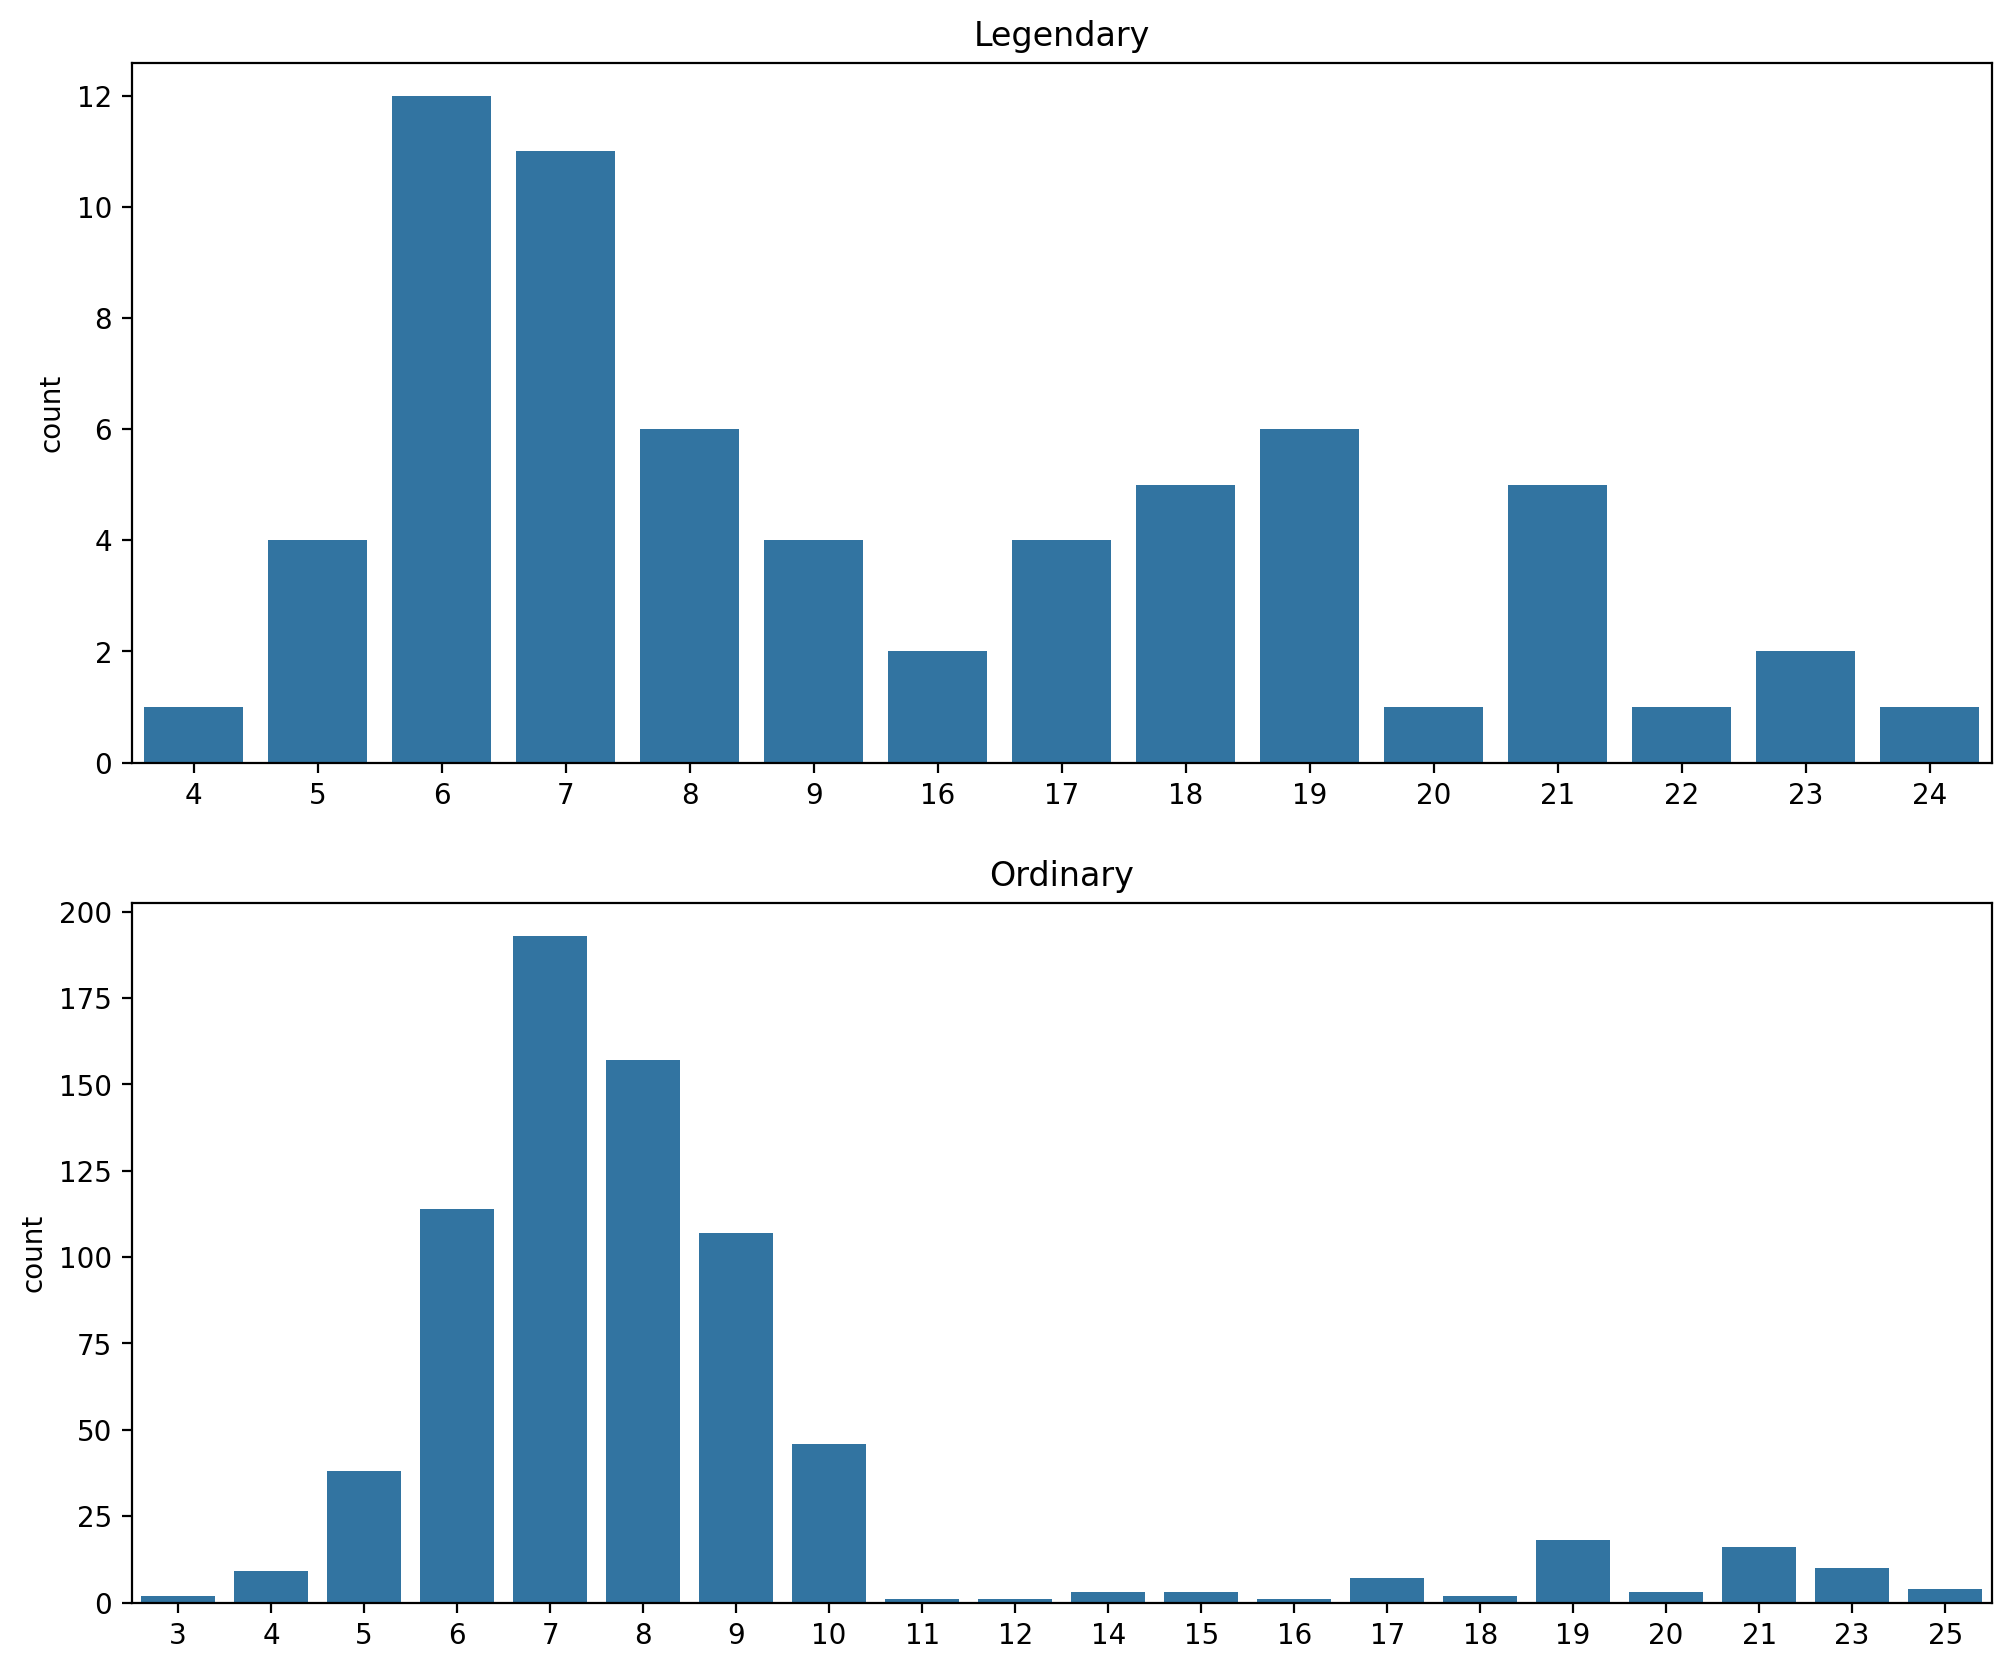

In [83]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [86]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print(round (len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


# 모델에 넣기 위해! 데이터 전처리하기


#### 이름의 길이가 10 이상인가?
---

In [93]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [91]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", "")) # isalpa가 띄어쓰기도 알파벳으로 인식하므로
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [ ]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha()) # isalpha()는 문자열이 알파벳으로만 이루어져 있는지 확인
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [96]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [100]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,NidoranX,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,NidoranY,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,MrMime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,PorygonTwo,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,HoOh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,PorygonZ,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,ZygardeForme,False


In [104]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha,name_nospace


In [ ]:
import re # 정규표현식을 사용하기 위한 라이브러리

In [ ]:
name = "CharizardMega Charizard X" # 예시로 하나의 이름을 가져옵니다.

In [ ]:
name_split = name.split(" ") # 띄어쓰기를 기준으로 이름을 나눕니다.
name_split

['CharizardMega', 'Charizard', 'X']

In [ ]:
temp = name_split[0] # 첫 번째 단어를 가져옵니다.
temp

'CharizardMega'

In [ ]:
tokens = re.findall('[A-Z][a-z]*', temp) #  대문자로 시작하고 소문자가 여러개인 패턴을 찾습니다.
tokens

['Charizard', 'Mega']

In [110]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [112]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    tokens = []
    a= re.findall('[A-Z][a-z]*', name)
    tokens.extend(a)
    return np.array(tokens)

tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [113]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
<built-in method count of list object at 0x0000026487911480>


#### Counter
---

In [120]:
from collections import Counter
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [121]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [122]:
most_common = Counter(token_set).most_common(10)
most_common

[(np.str_('Forme'), 15),
 (np.str_('Mega'), 6),
 (np.str_('Mewtwo'), 5),
 (np.str_('Kyurem'), 5),
 (np.str_('Deoxys'), 4),
 (np.str_('Hoopa'), 4),
 (np.str_('Latias'), 3),
 (np.str_('Latios'), 3),
 (np.str_('Kyogre'), 3),
 (np.str_('Groudon'), 3)]

In [123]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(types) # 속성의 종류

['Fairy', 'Ghost', 'Fire', 'Dragon', 'Normal', 'Bug', 'Water', 'Steel', 'Flying', 'Dark', 'Poison', 'Electric', 'Grass', 'Ice', 'Psychic', 'Fighting', 'Rock', 'Ground']


In [125]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fairy,Ghost,Fire,Dragon,Normal,Bug,Water,Steel,Flying,Dark,Poison,Electric,Grass,Ice,Psychic,Fighting,Rock,Ground
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [127]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [129]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [ ]:
target = 'Legendary'

'Legendary'

In [138]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = pokemon[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


# 딥러닝 시작하기 의사 결정 트리

In [141]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [142]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
# 포켓몬 데이터를 이용해 모델을 학습시킵니다.
model.fit(X_train, y_train) # X_train : feature, y_train : target
y_pred = model.predict(X_test) # X_test 데이터를 이용해 예측값을 만듭니다.
print('슝=3')

슝=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # 혼동 행렬을 출력합니다.

'''"Pokemon Parameter.ipynb"
Positive는 Legendary =(True)를 의미하고 Negative는 Legendary =(False)를 의미합니다.
TN (True Negative) : 옳게 판단한 Negative, 
FP (False Positive) : 틀리게 판단한 Positive, 
FN (False Negative) : 틀리게 판단한 Negative,
TP (True Positive) : 옳게 판단한 Positive, 
'''


array([[144,   3],
       [  5,   8]])

In [ ]:
#Accuracy 구하기
print(152/160) # Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [ ]:
len(legendary) # 전설의 포켓몬의 수

'''"Pokemon Parameter.ipynb"
전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다. 이것이 무엇을 뜻하죠?

바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 우리는 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.
classification_report를 활용해서 다른 값들도 확인해 보죠.
'''

65

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

'''"Pokemon Parameter.ipynb"
Precision(정밀도) = TP / (TP + FP)
Recall(재현율) = TP / (TP + FN)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
'''



              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [150]:
print(len(pokemon.columns))
print(pokemon.columns)
pokemon

46
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'name_nospace', 'Forme',
       'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios',
       'Kyogre', 'Groudon', 'Fairy', 'Ghost', 'Fire', 'Dragon', 'Normal',
       'Bug', 'Water', 'Steel', 'Flying', 'Dark', 'Poison', 'Electric',
       'Grass', 'Ice', 'Psychic', 'Fighting', 'Rock', 'Ground'],
      dtype='object')


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Flying,Dark,Poison,Electric,Grass,Ice,Psychic,Fighting,Rock,Ground
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,True,False,True,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,True,False,True,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,True,False,True,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,True,False,True,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,False,False,False,False,False,False,False,False,True,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,False,False,False,False,False,False,False,False,True,False
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,False,False,False,False,False,False,True,False,False,False
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
# features라는 변수에 모델 학습에 사용할 컬럼들만 추려서 저장한다.
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [152]:
target = "Legendary"
target

'Legendary'

In [153]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [154]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [156]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [159]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
# [[YOUR CODE]]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

# Q. classification report도 확인해봅시다!

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [160]:
# 포켓몬 속성별로 몇개의 데이터가 있는지 확인
pokemon[types].sum()

Fairy        40
Ghost        46
Fire         64
Dragon       50
Normal      102
Bug          72
Water       126
Steel        49
Flying      101
Dark         51
Poison       62
Electric     50
Grass        95
Ice          38
Psychic      90
Fighting     53
Rock         58
Ground       67
dtype: int64